# Q.4 Paniz Shakouri 

# Libraries

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow.keras import datasets,layers,models
from keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from PIL import Image
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Load & Preprocess data

In [5]:
(x_train,y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [6]:
x=np.concatenate((x_train,x_test),axis=0)
y=np.concatenate((y_train,y_test),axis=0)

# select 10,000 images

In [7]:
num_classes= 10
images_per_class_per_subset= 1000

In [8]:
img_sel=[]
label_sel=[]
for class_id in range(num_classes):
    indices=np.where(y==class_id)[0]
    indices_sel=np.random.choice(indices,images_per_class_per_subset,replace=False)
    img_sel.append(x[indices_sel])
    label_sel.append(y[indices_sel])
img_sel=np.concatenate(img_sel,axis=0)
label_sel=np.concatenate(label_sel,axis=0)

In [9]:
img_sel_LOW= []
for image in img_sel:
    low_img= Image.fromarray(image).resize((16, 16), Image.Resampling.LANCZOS)
    img_sel_LOW.append(np.array(low_img))
img_sel_LOW= np.array(img_sel_LOW)

# Split Main Dataset

In [10]:
train_size= 0.6
test_size= 0.2
val_size=0.2
total_samp= len(label_sel)
train_end = int(train_size * total_samp)
val_end = train_end + int(val_size * total_samp)


indices = np.arange(total_samp)
np.random.shuffle(indices)

train_i= indices[:train_end]
val_i= indices[train_end:val_end] 
test_i= indices[val_end:]

x_train = img_sel[train_i]
y_train = label_sel[train_i]
x_val = img_sel[val_i]
y_val = label_sel[val_i]
x_test = img_sel[test_i]
y_test = label_sel[test_i]

# Split LOW res Data

In [11]:
x_train_LOW = img_sel_LOW[train_i]
x_val_LOW = img_sel_LOW[val_i]
x_test_LOW = img_sel_LOW[test_i]

# Define CNN model (main res)

In [12]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),  
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax') 
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

c:\kernel\paniz\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:

x_train= x_train / 255
x_test= x_test / 255
x_val= x_val / 255
x_train_LOW= x_train_LOW / 255
x_test_LOW= x_test_LOW / 255
x_val_LOW= x_val_LOW / 255


# Dfine CNN Model for LOW res

In [14]:
model_LOW = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(16, 16, 3)),  
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax') 
])
model_LOW.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_LOW.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 5, 5, 32)       │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,890 (89.41 KB)

 Trainable params: 22,890 (89.41 KB)

 Non-trainable params: 0 (0.00 B)

# Plot accuracy & loss per epoch(main & low res)

In [15]:
history_main= model.fit(x_train,y_train, epochs=10, batch_size=16,validation_batch_size=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.2206 - loss: 2.0707
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4205 - loss: 1.5932
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4794 - loss: 1.4234
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5518 - loss: 1.2557
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5980 - loss: 1.1037
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6523 - loss: 0.9807
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6954 - loss: 0.8327
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7470 - loss: 0.6999
Epoch 9/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8018 - loss: 0.5975
Epoch 10/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8391 - loss: 0.4914


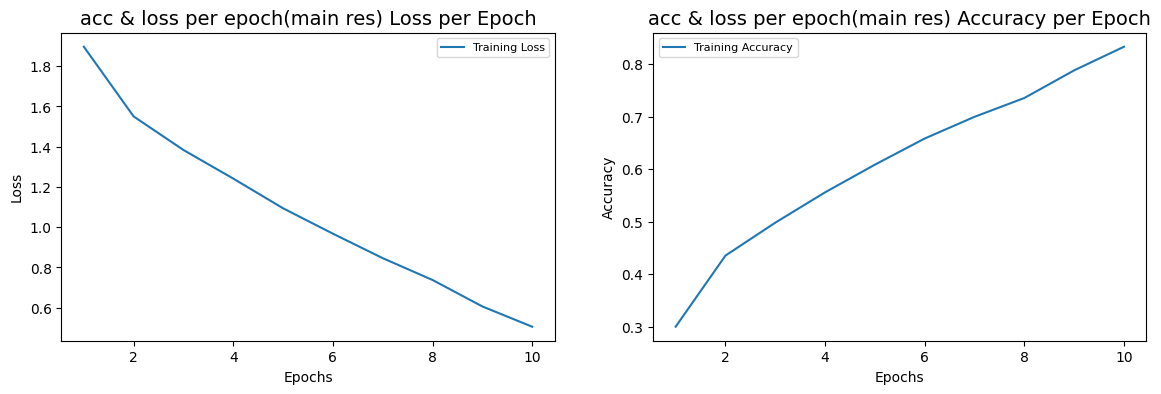

In [16]:
epochs= range(1, len(history_main.history['loss']) + 1)
title_prefix= "acc & loss per epoch(main res)"
plt.figure(figsize= (14, 4))

    # loss
plt.subplot(1, 2, 1)
plt.plot(epochs, history_main.history['loss'], label= 'Training Loss')

plt.title(f'{title_prefix} Loss per Epoch', fontsize= 14)
plt.xlabel('Epochs', fontsize= 10)
plt.ylabel('Loss', fontsize= 10)
plt.legend(fontsize= 8)
    
    # accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, history_main.history['accuracy'], label= 'Training Accuracy')

plt.title(f'{title_prefix} Accuracy per Epoch', fontsize= 14)
plt.xlabel('Epochs', fontsize= 10)
plt.ylabel('Accuracy', fontsize= 10)
plt.legend(fontsize= 8)

In [17]:
history = model_LOW.fit(x_train_LOW, y_train, epochs=10, batch_size=16, validation_batch_size=0.2)  

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1959 - loss: 2.1438
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3422 - loss: 1.8038
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3979 - loss: 1.6450
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4336 - loss: 1.5633
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4591 - loss: 1.4797
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4672 - loss: 1.4569
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4981 - loss: 1.3769
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4976 - loss: 1.3493
Epoch 9/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5221 - loss: 1.2922
Epoch 10/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5248 - loss: 1.2703


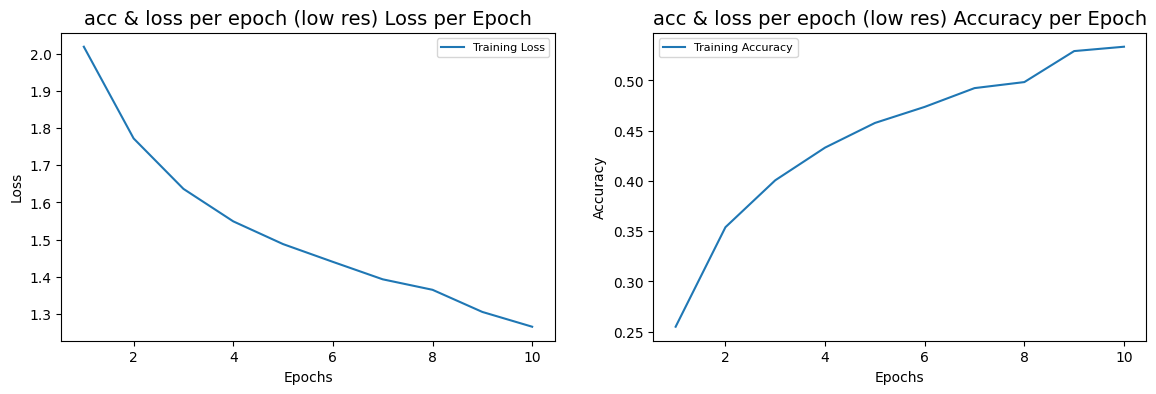

In [18]:
epochs= range(1, len(history.history['loss']) + 1)
title_prefix= "acc & loss per epoch (low res)"
plt.figure(figsize= (14, 4))

    # loss
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['loss'], label= 'Training Loss')

plt.title(f'{title_prefix} Loss per Epoch', fontsize= 14)
plt.xlabel('Epochs', fontsize= 10)
plt.ylabel('Loss', fontsize= 10)
plt.legend(fontsize= 8)
    
    # accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['accuracy'], label= 'Training Accuracy')

plt.title(f'{title_prefix} Accuracy per Epoch', fontsize= 14)
plt.xlabel('Epochs', fontsize= 10)
plt.ylabel('Accuracy', fontsize= 10)
plt.legend(fontsize= 8)

# Confusion matrix

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


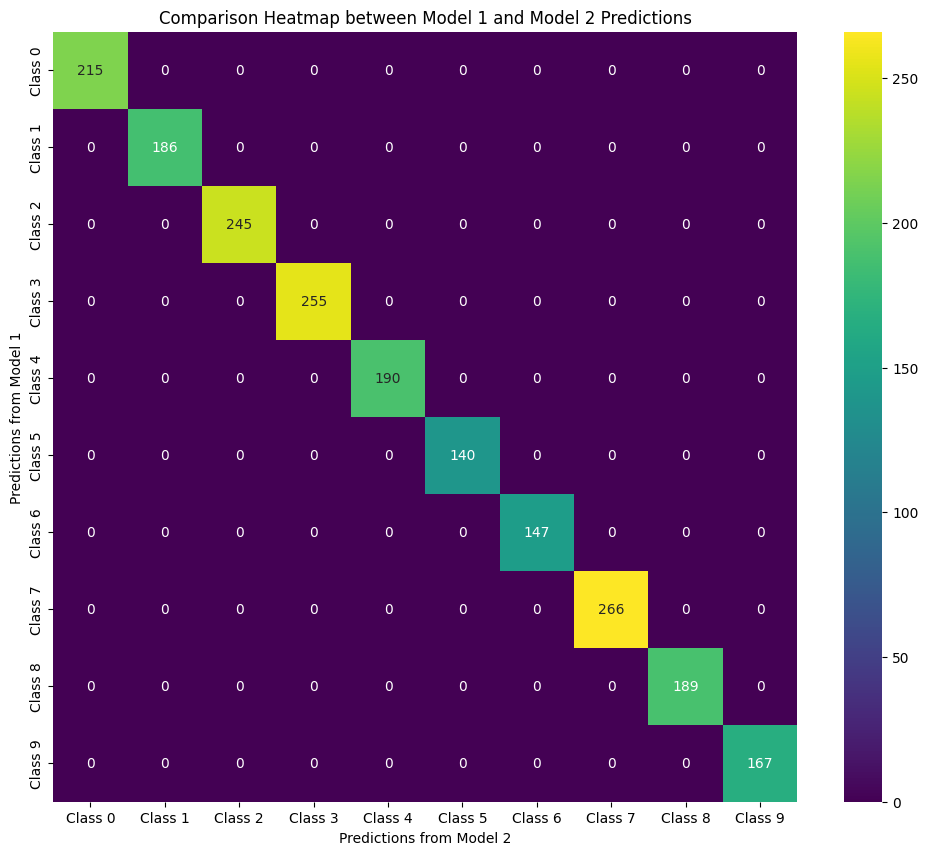

In [28]:
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true= np.argmax(model.predict(x_test), axis=1)
num_classes = 10
comparison_matrix = np.zeros((num_classes, num_classes))

for i in range(num_classes):
    for j in range(num_classes):
        
        comparison_matrix[i, j] = np.sum((y_pred == i) & (y_true== j))

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
ax = sns.heatmap(comparison_matrix, annot=True, fmt=".0f", cmap='viridis',xticklabels=[f'Class {j}' for j in range(10)],yticklabels=[f'Class {i}' for i in range(10)])
plt.title('Comparison Heatmap between Model 1 and Model 2 Predictions')
plt.xlabel('Predictions from Model 2')
plt.ylabel('Predictions from Model 1')
plt.show()



63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


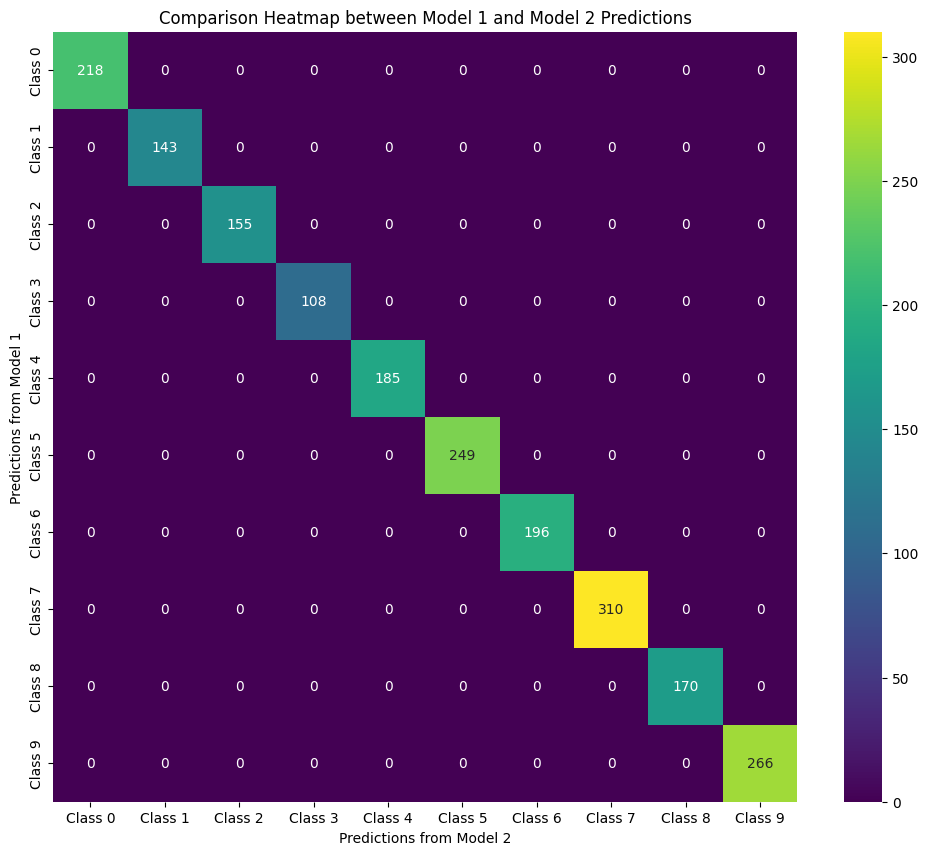

In [30]:
y_pred_LOW = np.argmax(model_LOW.predict(x_test_LOW), axis=1)
y_true= np.argmax(model_LOW.predict(x_test_LOW), axis=1)
num_classes = 10
comparison_matrix = np.zeros((num_classes, num_classes))

for i in range(num_classes):
    for j in range(num_classes):
        
        comparison_matrix[i, j] = np.sum((y_pred_LOW == i) & (y_true== j))

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
ax = sns.heatmap(comparison_matrix, annot=True, fmt=".0f", cmap='viridis',xticklabels=[f'Class {j}' for j in range(10)],yticklabels=[f'Class {i}' for i in range(10)])
plt.title('Comparison Heatmap between Model 1 and Model 2 Predictions')
plt.xlabel('Predictions from Model 2')
plt.ylabel('Predictions from Model 1')
plt.show()


# F1-score Recall Precision

# Main res as train and same as test

In [41]:
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true= np.argmax(model.predict(x_test), axis=1)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision (Weighted):", precision)
print("Recall (Weighted):", recall)
print("F1 Score (Weighted):", f1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy: 1.0
Precision (Weighted): 1.0
Recall (Weighted): 1.0
F1 Score (Weighted): 1.0


# Low res as train and low res as test

In [35]:
y_pred_LOW= np.argmax(model_LOW.predict(x_test_LOW), axis=1)
y_true= np.argmax(model_LOW.predict(x_test_LOW), axis=1)
accuracy = accuracy_score(y_true, y_pred_LOW)
precision = precision_score(y_true, y_pred_LOW, average='weighted')
recall = recall_score(y_true, y_pred_LOW, average='weighted')
f1 = f1_score(y_true, y_pred_LOW, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


# main res as train and low res as test

In [47]:
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = y_test
if len(y_test.shape) > 1:  # Check if one-hot encoded
    y_true = np.argmax(y_test, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy: 0.1075
Precision: 1.0
Recall: 0.1075
F1 Score: 0.19413092550790068


c:\kernel\paniz\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Low res as train and main res as test

In [49]:
y_pred = np.argmax(model_LOW.predict(x_test_LOW), axis=1)
y_true = y_train
if len(y_test.shape) > 1:  # Check if one-hot encoded
    y_true = np.argmax(y_test, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.109
Precision: 1.0
Recall: 0.109
F1 Score: 0.19657348963029755


c:\kernel\paniz\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
